<a href="https://colab.research.google.com/github/CrushedKatana/Machine_Learning/blob/main/JS09_TG01_2341720205_Charellino_Kalingga_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 0



### Random Split

In [382]:
import pandas as pd

df = pd.read_csv('/content/Titanic-Dataset-selected.csv')
display(df.head())

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [383]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

# Split lagi antara validasi dan testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

# Cek masing-masing ukuran data

print(f'Jumlah data asli: {df.shape[0]}')
print(f'Jumlah data train: {df_train.shape[0]}')
print(f'Jumlah data val: {df_val.shape[0]}')
print(f'Jumlah data test: {df_test.shape[0]}')

# Cek rasio tiap label
print('=========')
print(f'Jumlah label data asli:\n{df.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df_test.Survived.value_counts()}')

Jumlah data asli: 891
Jumlah data train: 712
Jumlah data val: 89
Jumlah data test: 90
Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    53
1    36
Name: count, dtype: int64
Jumlah label data test:
Survived
0    57
1    33
Name: count, dtype: int64


### Stratified Split

In [384]:
import pandas as pd

df2 = pd.read_csv('/content/Titanic-Dataset-selected.csv')
display(df2.head())

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [385]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df2_train, df2_unseen = train_test_split(df2, test_size=0.2, random_state=0, stratify=df['Survived'])

# Split lagi antara validasi dan testing
df2_val, df2_test = train_test_split(df2_unseen, test_size=0.5, random_state=0, stratify=df_unseen['Survived'])

# Cek masing-masing ukuran data

print(f'Jumlah label data asli:\n{df2.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df2_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df2_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df2_test.Survived.value_counts()}')

Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    51
1    38
Name: count, dtype: int64
Jumlah label data test:
Survived
0    59
1    31
Name: count, dtype: int64


### Cross Validation 1

In [386]:
import pandas as pd

df3 = pd.read_csv('/content/Titanic-Dataset-selected.csv')
df3.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [387]:
# Implementasi k-fold cross validation (random) dengan training dan testing saja
from sklearn.model_selection import KFold

# inisiasi obyek kfold
kf = KFold(n_splits=4)
print(f'Jumlah fold: {kf.get_n_splits()}')
print(f'Obyek KFold: {kf}')

# Lakukan splitting dengan KFold
kf_split = kf.split(df3)
print(f'Jumlah data df: {df.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df: 891
Index train: [223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438
 439 440 44

### Cross Validation 2

In [388]:
import pandas as pd

df4 = pd.read_csv('/content/Titanic-Dataset-selected.csv')
df4.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [389]:
# Implementasi k-fold cross validation (random) dengan training, validation, dan testing data
from sklearn.model_selection import train_test_split, KFold

# Split dulu antara data training dan testing dengan train_test_split
# Rasio 8:2 untuk training dan testing
df4_train, df4_test = train_test_split(df4, test_size=0.2, random_state=0)

# inisiasi obyek kfold
kf2 = KFold(n_splits=4)
print(f'Jumlah fold: {kf2.get_n_splits()}')
print(f'Obyek KFold: {kf2}')

# Lakukan splitting dengan KFold untuk data df_training
# Dengan acara ini, kita masih memiliki data testing untuk keperluan pengujian model
# namun tetap dapat melakukan evaluasi dengan menggunakan data validasi
kf2_split = kf2.split(df_train)
print(f'Jumlah data df_train: {df4_train.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf2_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df_train: 712
Index train: [178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393
 394 

## Lab 1

### Step 1

Download dan letakkan file data yang akan digunakan pada direktori yang sama. Pastikan data telah disimpan dalam format CSV.

### Step 2

In [390]:
# import package
import numpy as np
import pandas as pd

### Step 3

In [391]:
# read data from CSV file
data = pd.read_csv('dataset.csv')

### Step 4

In [392]:
# view some initial data
data.head()

# check data dimensions
data.shape

# information about the data
data.info()

# data description
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Step 5

In [393]:
# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

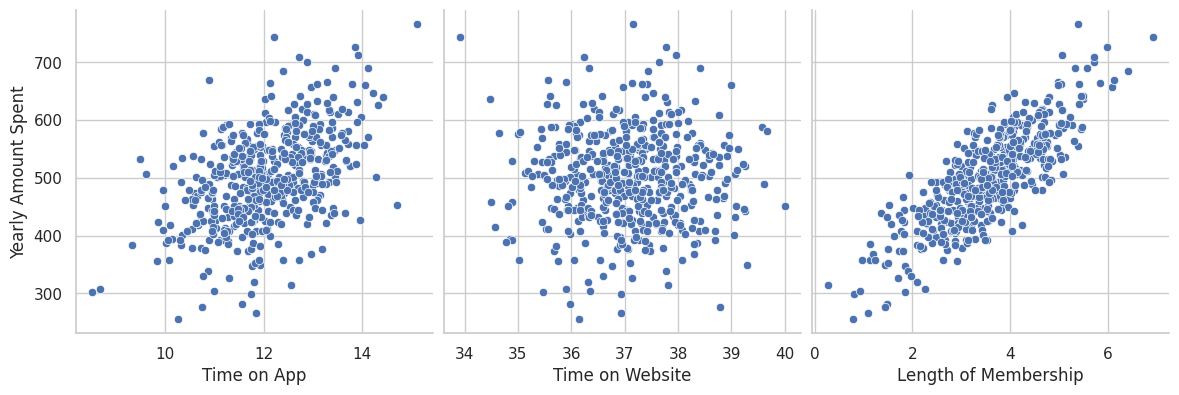

In [394]:
# visualize data with pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', height=4, aspect=1, kind='scatter')
plt.show()

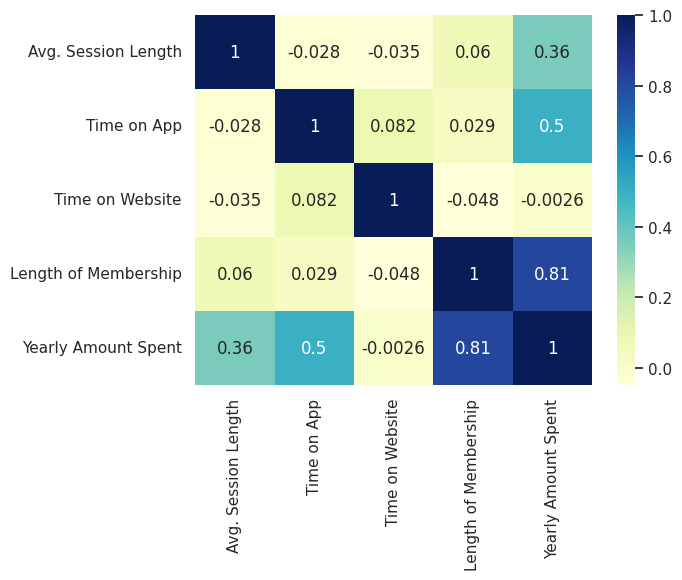

In [395]:
# visualize correlation with heatmap
sns.heatmap(data.drop(['Email', 'Address', 'Avatar'], axis=1).corr(), cmap="YlGnBu", annot=True)
plt.show()

### Step 6

In [396]:
# Create independent variable X and Y, example selection from prior correlation analysis
X = data['Length of Membership']
y = data['Yearly Amount Spent']

In [397]:
# Split training and test data with a 7:3 proportion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [398]:
# Model training
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

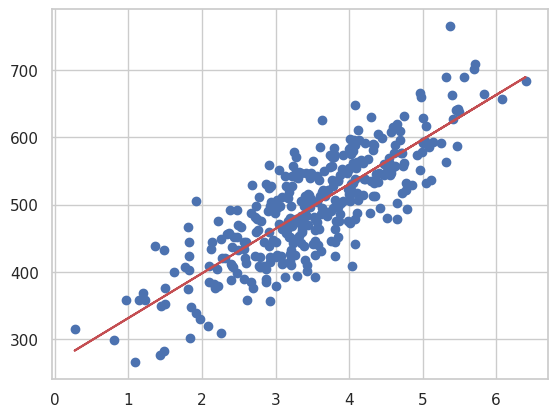

In [399]:
# Visualization of regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

### Step 7

In [400]:
# Predict y_value from the trained x data
y_train_pred = lr.predict(X_train_sm)

# Calculating residuals
res = (y_train - y_train_pred)

/tmp/ipython-input-4216909171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


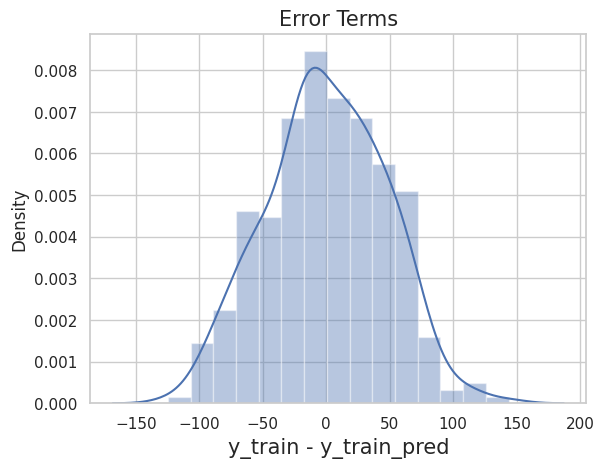

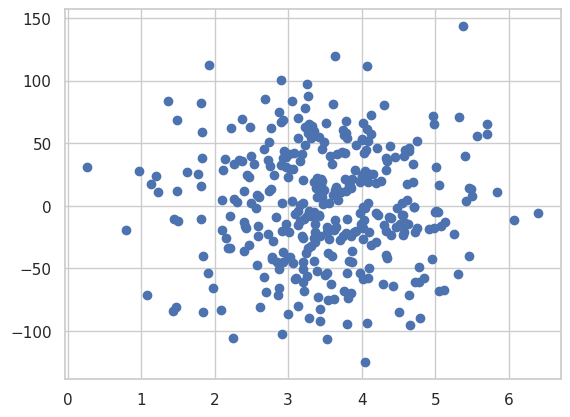

In [401]:
# Residual histogram
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Residual scatter plot
plt.scatter(X_train, res)
plt.show()

### Step  8

In [402]:
# Prediction on test data
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [403]:
# Compute R-squared value
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

### Step 9

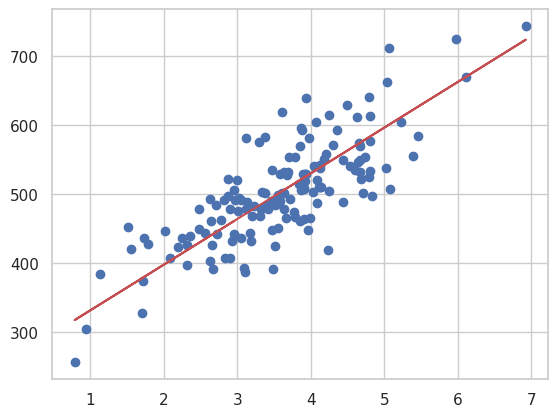

In [404]:
# Visualize test data and prediction results
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

## Lab 2

### Step 1

In [405]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Step 2

In [406]:
# Importing the dataset (Ensure you have the CSV file 'Posisi_gaji.csv' in the same directory)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Change to a single column only

### Step 3

In [407]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

### Step 4

In [408]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y.ravel())

SVR()

### Step 5

/tmp/ipython-input-3243201412.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


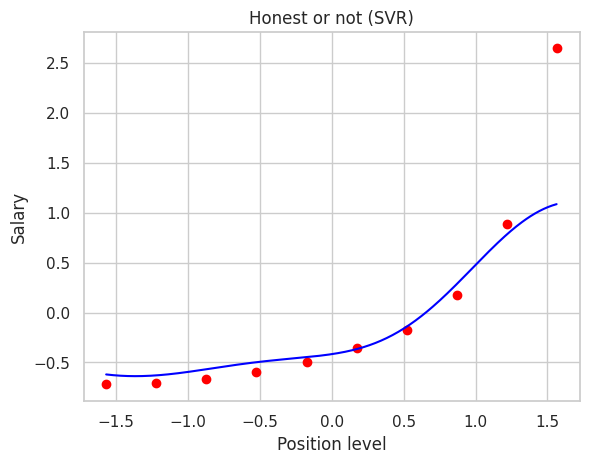

In [409]:
# Visualizing SVR results (higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Honest or not (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Step 6

In [410]:
# Predicting the result
# Create a 2D array containing the position level to be predicted
position_level_to_predict = np.array([[6.5]])
# Feature scaling for the data to be predicted
position_level_to_predict = sc_X.transform(position_level_to_predict)
# Perform prediction using the SVR model
predicted_salary = regressor.predict(position_level_to_predict)
# Return the predicted result to the original scale
predicted_salary = sc_y.inverse_transform(predicted_salary.reshape(-1, 1))

### Step 7

In [411]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", predicted_salary[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


### Step 8

In [412]:
# Evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Calculating MAE
mae = mean_absolute_error(y_actual, y_pred)

# Calculating MSE
mse = mean_squared_error(y_actual, y_pred)

# Calculating RMSE
rmse = np.sqrt(mse)

# Calculating R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


# Lab Assignment

## **General Instructions:**

1. You will utilize the "Medical Cost Personal Datasets". Ensure that you have downloaded this dataset.
2. Employ the Python programming language and appropriate libraries such as NumPy, Pandas, Matplotlib, and Scikit-Learn to perform regression analysis and SVR.

## Tasks

1. Identify the variables to be used as independent variables (features) and the target variable (personal medical cost).
2. Partition the dataset into training and testing subsets with an appropriate proportion.
3. Perform feature scaling if required.
4. Construct a multiple linear regression model using Scikit-Learn.
5. Train the model on the training data and perform predictions on the testing data.
6. Evaluate the model by computing metrics such as R-squared, MSE, and MAE. Present the evaluation results.
7. Repeat step 4 using an SVR model. You may experiment by performing *hyperparameter tuning*.

## Additional Notes

* Ensure to provide a concise description of the dataset used, including descriptions of relevant variables.
* Present relevant data visualizations such as scatter plots or other graphs if necessary for improved understanding.
* Analyze the results obtained in your practical assignment.



#### Answer

In [413]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the dataset
try:
    df = pd.read_csv("insurance.csv")

    # --- Initial Preprocessing ---
    # Convert categorical variables to numerical (needed before splitting)
    df_processed = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

    print("Data loaded and preprocessed (one-hot encoding).")
    print(df_processed.head())

except FileNotFoundError:
    print("Error: 'insurance.csv' not found. Make sure it is in the same directory.")

Data loaded and preprocessed (one-hot encoding).
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  



1. Identify the variables to be used as independent variables (features) and the target variable (personal medical cost).

In [414]:
# Task 1: Identify the variables
# Target variable (y)
y = df_processed['charges']

# Independent variables (X)
# We drop the original target 'charges'
X = df_processed.drop('charges', axis=1)

print("\n--- Task 1: Variables Identified ---")
print(f"Target variable (y): 'charges'")
print(f"Features (X) columns: {list(X.columns)}")


--- Task 1: Variables Identified ---
Target variable (y): 'charges'
Features (X) columns: ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


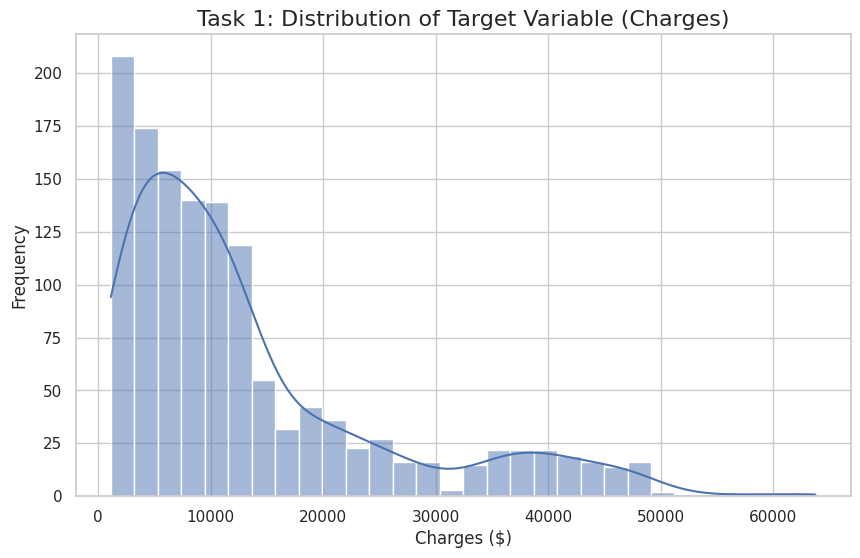

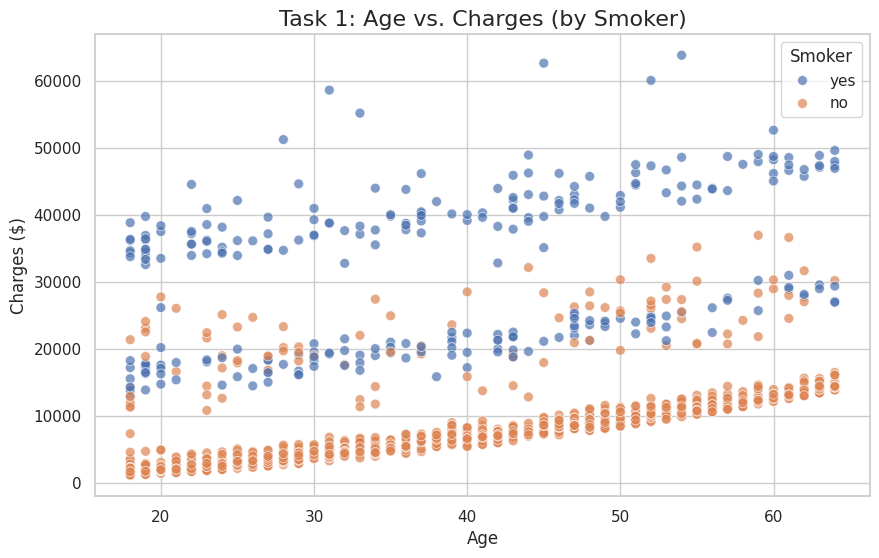

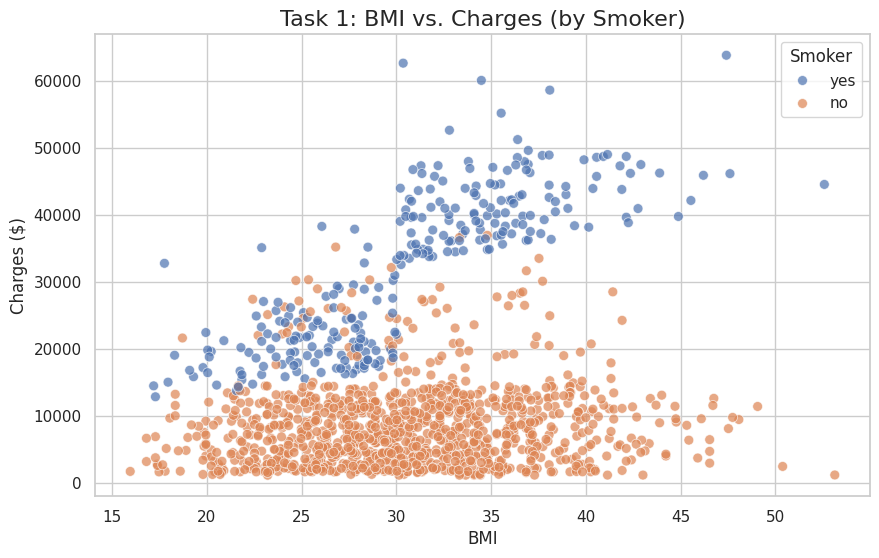

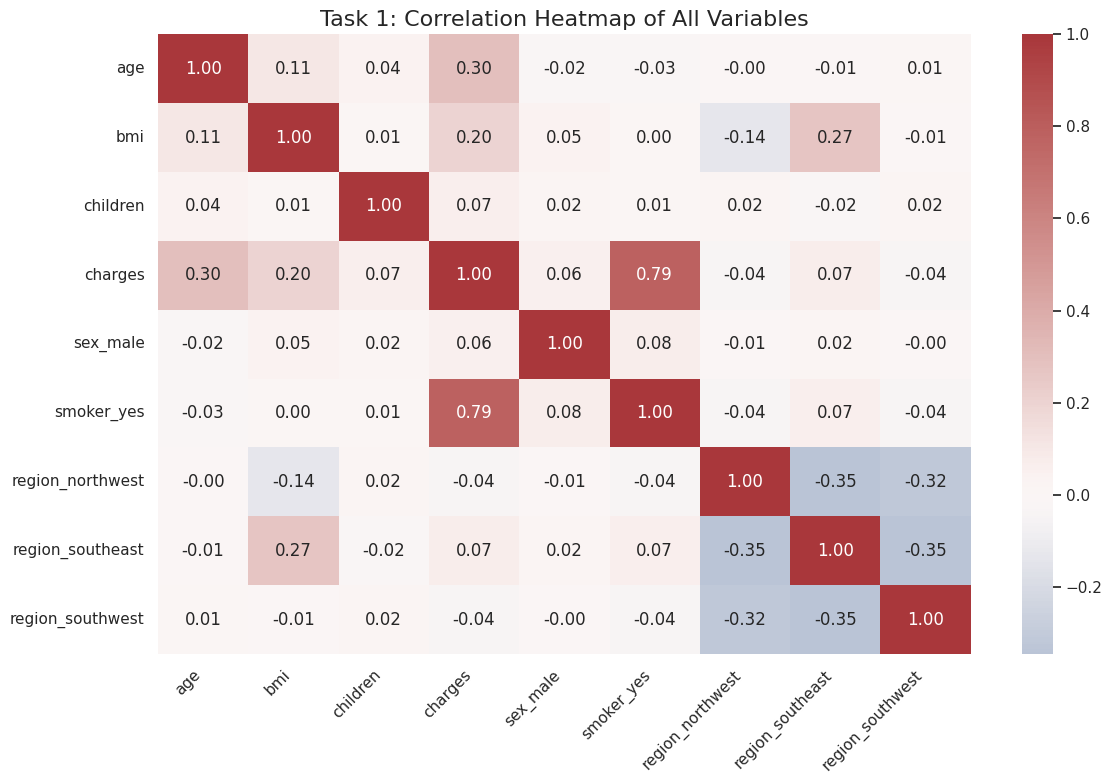

In [415]:
# 1.1: Distribution of the Target Variable (Charges)
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Task 1: Distribution of Target Variable (Charges)', fontsize=16)
plt.xlabel('Charges ($)')
plt.ylabel('Frequency')
plt.savefig('task1_target_distribution.png')
plt.show()
plt.close()

# 1.2: Feature vs. Target (Age vs. Charges)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', alpha=0.7, s=50)
plt.title('Task 1: Age vs. Charges (by Smoker)', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.legend(title='Smoker')
plt.savefig('task1_age_vs_charges.png')
plt.show()
plt.close()

# 1.3: Feature vs. Target (BMI vs. Charges)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.7, s=50)
plt.title('Task 1: BMI vs. Charges (by Smoker)', fontsize=16)
plt.xlabel('BMI')
plt.ylabel('Charges ($)')
plt.legend(title='Smoker')
plt.savefig('task1_bmi_vs_charges.png')
plt.show()
plt.close()

# 1.4: Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df_processed.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title('Task 1: Correlation Heatmap of All Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('task1_correlation_heatmap.png')
plt.show()
plt.close()

2. Partition the dataset into training and testing subsets with an appropriate proportion.

In [416]:
# Task 2: Partition the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Task 2: Data Partitioned ---")
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")


--- Task 2: Data Partitioned ---
Training set shape: X_train=(1070, 8), y_train=(1070,)
Testing set shape: X_test=(268, 8), y_test=(268,)


/tmp/ipython-input-2054597619.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=split_df, x='Set', y='Count', palette='Blues_d')


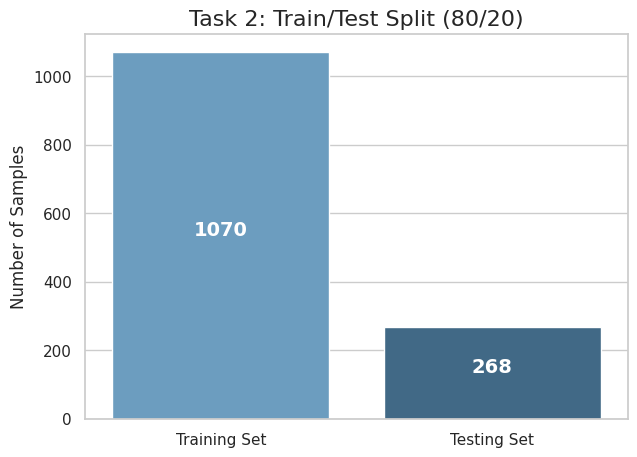

In [417]:
# Create a DataFrame for plotting the split
split_data = {'Set': ['Training Set', 'Testing Set'],
              'Count': [len(y_train), len(y_test)]}
split_df = pd.DataFrame(split_data)

plt.figure(figsize=(7, 5))
sns.barplot(data=split_df, x='Set', y='Count', palette='Blues_d')
plt.title('Task 2: Train/Test Split (80/20)', fontsize=16)
plt.ylabel('Number of Samples')
plt.xlabel('')
# Add text labels
for index, row in split_df.iterrows():
    plt.text(index, row['Count'] / 2, row['Count'],
             color='white', ha="center", fontsize=14, fontweight='bold')
plt.savefig('task2_traintest_split.png')
plt.show()
plt.close()

3. Perform feature scaling if required.


In [418]:
# Task 3: Perform feature scaling (on features X)
scaler_X = StandardScaler()

# Fit the scaler ONLY on the training data
X_train_scaled = scaler_X.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler_X.transform(X_test)

print("\n--- Task 3: Feature Scaling Applied ---")
print("X_train and X_test have been scaled using StandardScaler.")


--- Task 3: Feature Scaling Applied ---
X_train and X_test have been scaled using StandardScaler.


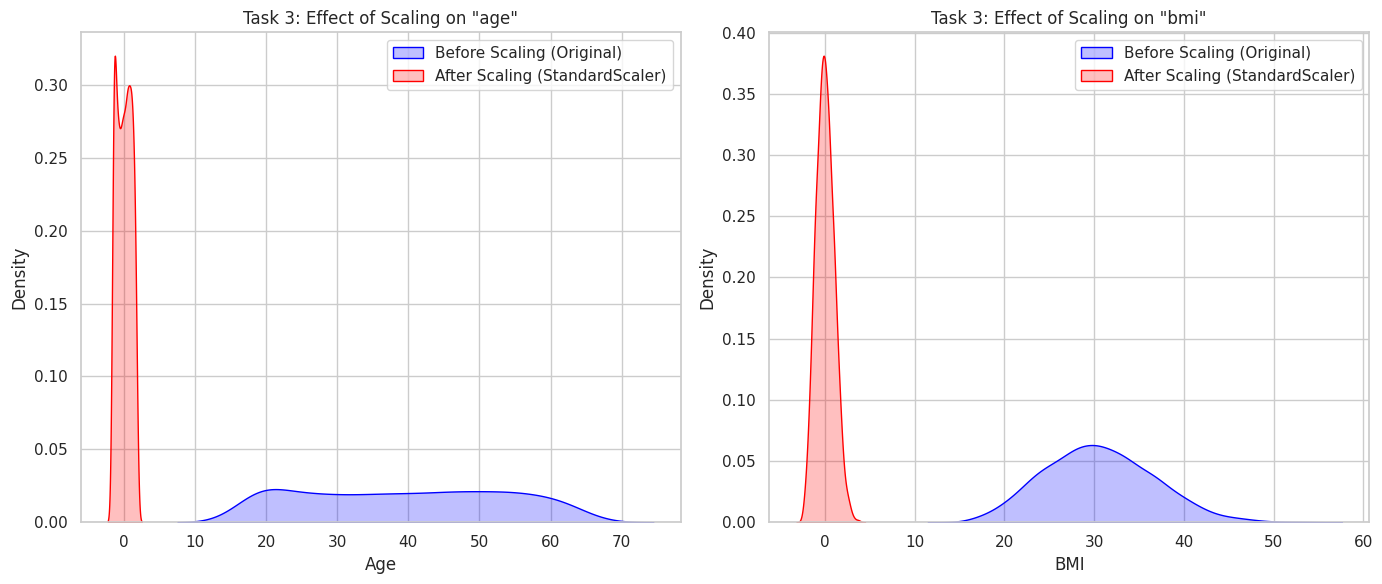

In [419]:
plt.figure(figsize=(14, 6))

# 3.1: Age Scaling
plt.subplot(1, 2, 1)
sns.kdeplot(X_train['age'], label='Before Scaling (Original)', color='blue', fill=True)
sns.kdeplot(X_train_scaled_df['age'], label='After Scaling (StandardScaler)', color='red', fill=True)
plt.title('Task 3: Effect of Scaling on "age"')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

# 3.2: BMI Scaling
plt.subplot(1, 2, 2)
sns.kdeplot(X_train['bmi'], label='Before Scaling (Original)', color='blue', fill=True)
sns.kdeplot(X_train_scaled_df['bmi'], label='After Scaling (StandardScaler)', color='red', fill=True)
plt.title('Task 3: Effect of Scaling on "bmi"')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.savefig('task3_scaling_comparison.png')
plt.show()
plt.close()

4. Construct a multiple linear regression model using Scikit-Learn.


In [420]:
# Task 4: Construct the MLR model
mlr = LinearRegression()

print("\n--- Task 4: MLR Model Constructed ---")
print(f"Model object: {mlr}")


--- Task 4: MLR Model Constructed ---
Model object: LinearRegression()


5. Train the model on the training data and perform predictions on the testing data.


In [421]:
# Task 5: Train the model and predict

# Train on the scaled training data
mlr.fit(X_train_scaled, y_train)
print("\n--- Task 5: MLR Model Trained ---")

# Perform predictions on the scaled testing data
y_pred_mlr = mlr.predict(X_test_scaled)

print("Predictions made on the test set.")
print(f"First 5 MLR predictions: {y_pred_mlr[:5]}")


--- Task 5: MLR Model Trained ---
Predictions made on the test set.
First 5 MLR predictions: [ 8969.55027444  7068.74744287 36858.41091155  9454.67850053
 26973.17345656]


6. Evaluate the model by computing metrics such as R-squared, MSE, and MAE. Present the evaluation results.


In [422]:
# Task 6: Evaluate the MLR model
r2_mlr = r2_score(y_test, y_pred_mlr)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)

print("\n--- Task 6: MLR Evaluation Results ---")
print(f"R-squared (R2): {r2_mlr:.4f}")
print(f"Mean Squared Error (MSE): {mse_mlr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_mlr:.2f}")


--- Task 6: MLR Evaluation Results ---
R-squared (R2): 0.7836
Mean Squared Error (MSE): 33596915.85
Mean Absolute Error (MAE): 4181.19


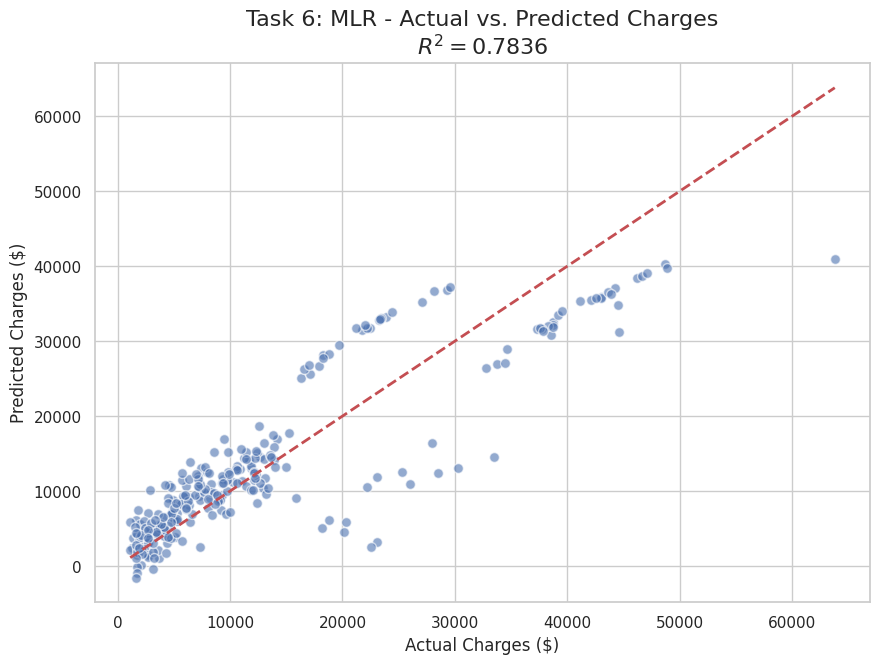

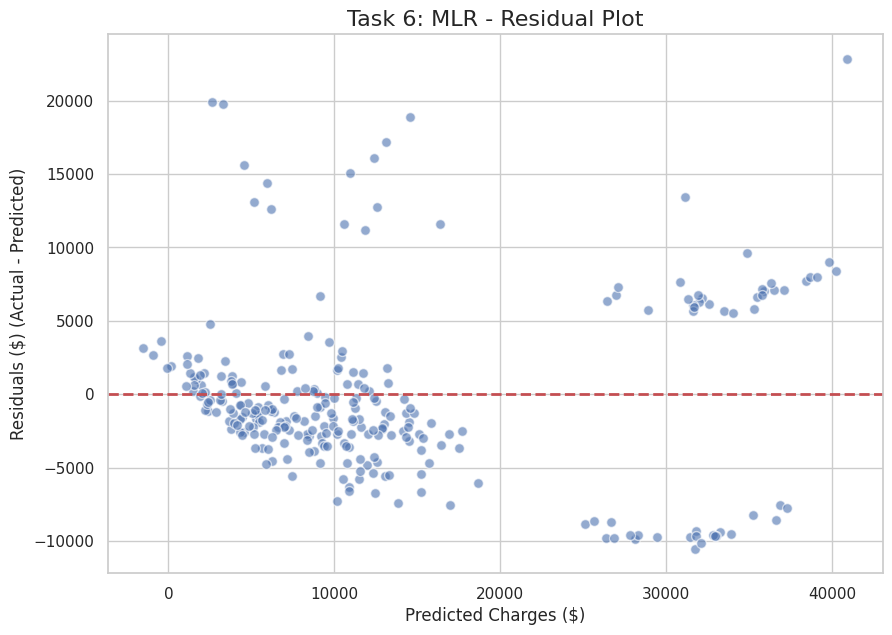

In [423]:
# 6.1: MLR Predictions vs. Actual
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred_mlr, alpha=0.6, edgecolors='w', s=50)
# Add the 'perfect prediction' line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Task 6: MLR - Actual vs. Predicted Charges\n$R^2 = {r2_score(y_test, y_pred_mlr):.4f}$', fontsize=16)
plt.xlabel('Actual Charges ($)')
plt.ylabel('Predicted Charges ($)')
plt.grid(True)
plt.savefig('task6_mlr_predictions.png')
plt.show()
plt.close()

# 6.2: MLR Residual Plot
plt.figure(figsize=(10, 7))
plt.scatter(y_pred_mlr, residuals_mlr, alpha=0.6, edgecolors='w', s=50)
# Add a horizontal line at 0 error
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Task 6: MLR - Residual Plot', fontsize=16)
plt.xlabel('Predicted Charges ($)')
plt.ylabel('Residuals ($) (Actual - Predicted)')
plt.grid(True)
plt.savefig('task6_mlr_residuals.png')
plt.show()
plt.close()

7. Repeat step 4 using an SVR model. You may experiment by performing hyperparameter tuning.

In [424]:
# Task 7: SVR Model (All Steps)
print("\n--- Task 7: SVR Model (All Steps) ---")

# Step 7.1: Scale the target variable (y) for SVR
scaler_y = StandardScaler()
# Note: y_train.values.reshape(-1, 1) is needed to make it a 2D array for the scaler
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel() # .ravel() flattens it back to 1D

print("SVR Step: Target variable (y_train) scaled.")

# Step 7.2: Construct SVR model and define parameter grid for tuning
svr = SVR()
# Note: A larger grid was used in the full report; this is a faster example.
param_grid_svr = {
    'C': [1000, 5000, 10000],
    'gamma': ['scale', 0.01],
    'kernel': ['rbf']
}

print(f"SVR Step: Model and parameter grid defined.")

# Step 7.3: Perform hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(svr, param_grid_svr, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

print("SVR Step: Starting GridSearchCV...")
# Fit on scaled X AND scaled y
grid_search.fit(X_train_scaled, y_train_scaled)

print(f"SVR Step: Tuning complete. Best parameters found: {grid_search.best_params_}")

# Step 7.4: Get the best model and predict
best_svr = grid_search.best_estimator_
y_pred_svr_scaled = best_svr.predict(X_test_scaled)

print("SVR Step: Predictions made with the best SVR model.")

# Step 7.5: Inverse transform predictions
# We must convert predictions back to the original dollar scale
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).ravel()
print("SVR Step: Predictions inverse-transformed to original scale.")

# Step 7.6: Evaluate the SVR model
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print("\n--- SVR Evaluation Results (Task 7) ---")
print(f"R-squared (R2): {r2_svr:.4f}")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")


--- Task 7: SVR Model (All Steps) ---
SVR Step: Target variable (y_train) scaled.
SVR Step: Model and parameter grid defined.
SVR Step: Starting GridSearchCV...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
SVR Step: Tuning complete. Best parameters found: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVR Step: Predictions made with the best SVR model.
SVR Step: Predictions inverse-transformed to original scale.

--- SVR Evaluation Results (Task 7) ---
R-squared (R2): 0.8639
Mean Squared Error (MSE): 21133140.48
Mean Absolute Error (MAE): 2452.60


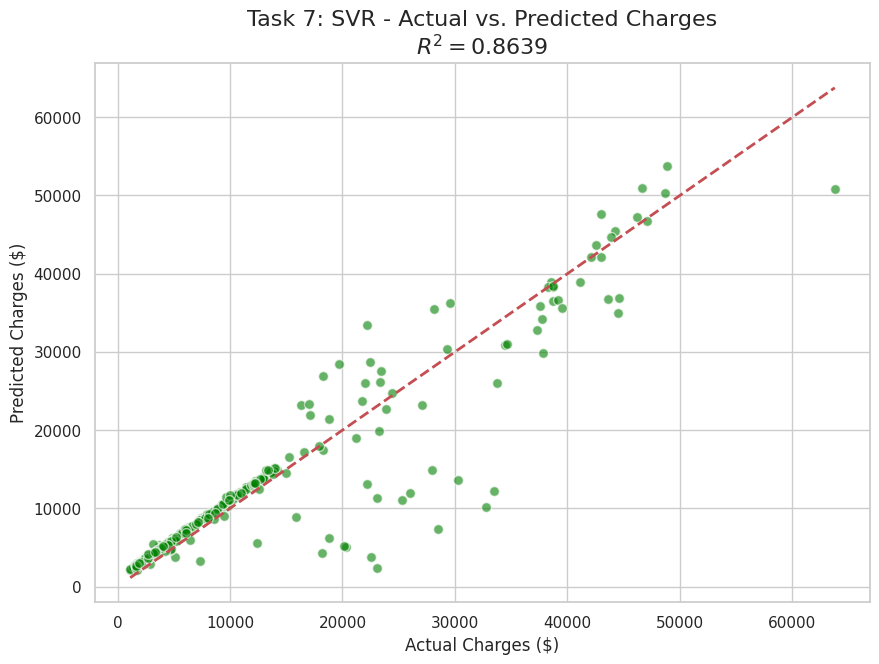

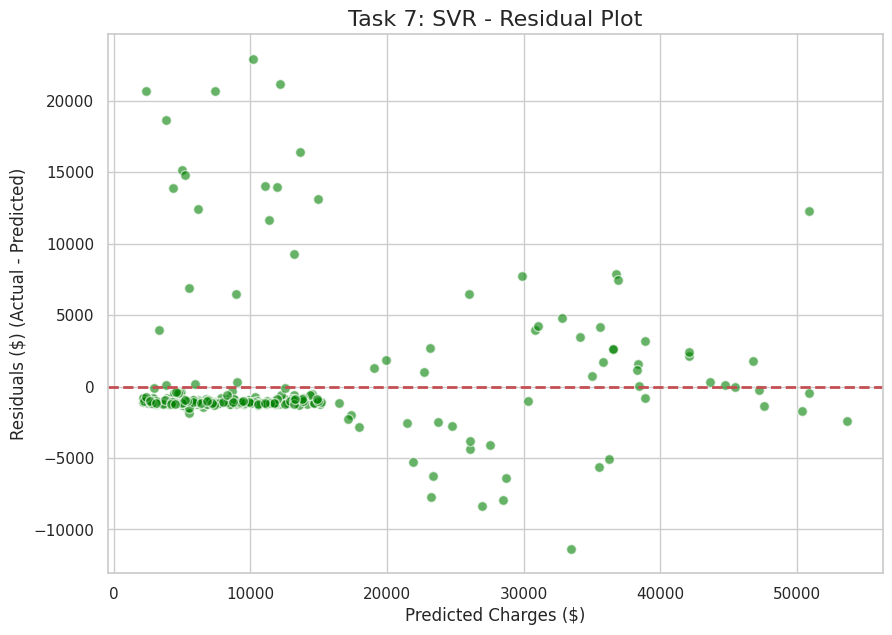

In [425]:
# 7.1: SVR Predictions vs. Actual
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred_svr, alpha=0.6, edgecolors='w', s=50, c='green')
# Add the 'perfect prediction' line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Task 7: SVR - Actual vs. Predicted Charges\n$R^2 = {r2_score(y_test, y_pred_svr):.4f}$', fontsize=16)
plt.xlabel('Actual Charges ($)')
plt.ylabel('Predicted Charges ($)')
plt.grid(True)
plt.savefig('task7_svr_predictions.png')
plt.show()
plt.close()

# 7.2: SVR Residual Plot
plt.figure(figsize=(10, 7))
plt.scatter(y_pred_svr, residuals_svr, alpha=0.6, edgecolors='w', s=50, c='green')
# Add a horizontal line at 0 error
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Task 7: SVR - Residual Plot', fontsize=16)
plt.xlabel('Predicted Charges ($)')
plt.ylabel('Residuals ($) (Actual - Predicted)')
plt.grid(True)
plt.savefig('task7_svr_residuals.png')
plt.show()
plt.close()